In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from google.colab import drive
from tensorflow.keras import layers, models

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set up the testing images and the training images. Each images pass through a resize and normalization function.

In [ ]:
imagesTesting = []
labelsTesting = []
imagesTraining = []
labelsTraining = []
classLabels = ['barberry', 'bayberry', 'beach plum', 'bearberry', 'black berry', 'black cherry', 'blueberry', 'ceylon gooseberry', 'chokeberry', 'crowberry']

target_size = (224, 224)


def readTestingImages(i):
    os.chdir('/content/drive/MyDrive/Colab Notebooks/Images/Testing')

    for filename in os.listdir():
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read Image
            image = cv2.imread(filename)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Resize the image
            image_resized = cv2.resize(image_rgb, target_size)

            # Normalize the image
            image_normalized = image_resized / 255.0

            if i < 150:
              imagesTesting.append(image_normalized)

            # Extract label from filename
            labels = filename.rsplit("_", 1)
            label = labels[0].replace('_', ' ')

            # Get the index of the label in classLabels
            label_index = classLabels.index(label)

            if i < 150:
              labelsTesting.append(label_index)

            i += 1
            if i == 200:
              i = 0

i = 1
def readTrainingImages(i):
    os.chdir('/content/drive/MyDrive/Colab Notebooks/Images/Training')

    for filename in os.listdir():
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read Image
            image = cv2.imread(filename)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Resize the image
            image_resized = cv2.resize(image_rgb, target_size)

            # Normalize the image
            image_normalized = image_resized / 255.0

            if i < 50:
              imagesTraining.append(image_normalized)

            # Extract label from filename
            labels = filename.rsplit("_", 1)
            label = labels[0].replace('_', ' ')

            # Get the index of the label in classLabels
            label_index = classLabels.index(label)

            if i < 50:
              labelsTraining.append(label_index)

            i += 1
            if i == 200:
              i = 0

readTestingImages(1)
readTrainingImages(1)

(224, 224, 3)
5


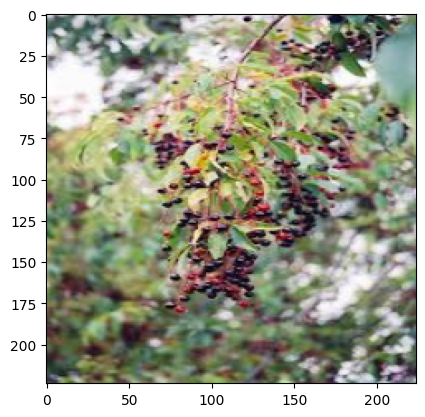

In [ ]:
# print(len(imagesTraining))
# print(len(imagesTesting))
# print(imagesTraining[0].shape)
# print(labelsTraining[0])
# plt.imshow(imagesTraining[0])
# plt.show()
# print(labelsTesting)
# device_name = tf.test.gpu_device_name()
# print(device_name)

# FIRST TRY MODEL

Set up the CNN architecture

We start with a architecture of 7 layers. 2 are convolutional layers. 2 are max-pooling layers, a layer to flatten the previous output into a 1D vector, and 2 connected layers (dense layers).

**model = models.Sequential()**: this creates a sequential model, which is a linear stack of layers

**model.add(layers.Vonc2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))**: adds a 2D convolutional layer to the model with 32 filters. The number of filters determine the number of channels of the output feature maps. Each filter produces one feature map, and these feature maps collectively capture different aspects of the input data.

**model.add(layers.MaxPooling2D((2, 2)))**: adds a max-pooling layer to the model with a pool size of 2x2. Max-pooling reduces the spatial dimensions of the feature maps.

**model.add(layers.Flatten())**: this flattens the output of the previous layer into a 1D vector. This reshapes the multi-dimensional feature maps into a 1D vector that can be fed into the fully connected layer. Each element in the vector corresponds to a specific feature or activation in the feature map.

**model.add(layers.Dense(64, activation='relu'))**: This adds a fully connected (dense) layer with 64 units and the ReLU activation function.

**model.add(layers.Dense(10))**: This adds the final fully connected layer with 10 units. Since this is a classification problem with 10 classes, this layer will produce the output logits for each class.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 64)                1

Training

We compile the model using the following configuration:

**optmizer=adam**: this sets the optimizer to adam

**loss**: we set the loss function to sparse categorical crossentropy, indicating that the model does not have softmax activation applied, and the raw logits are used for calculating loss

**metrics=accuracy**: indicates that the accuracy should be calculated during training

To train the model, first we pass the images and labels list as numpy arrays and set the epoch value to 10.

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(np.array(imagesTraining), np.array(labelsTraining), epochs=70, validation_data=(np.array(imagesTesting), np.array(labelsTesting)))

Epoch 1/70
16/16 [==============================] - 11s 266ms/step - loss: 4.5277 - accuracy: 0.1100 - val_loss: 2.2248 - val_accuracy: 0.1800
Epoch 2/70
16/16 [==============================] - 2s 124ms/step - loss: 2.0753 - accuracy: 0.2560 - val_loss: 2.0224 - val_accuracy: 0.2820
Epoch 3/70
16/16 [==============================] - 1s 94ms/step - loss: 1.4689 - accuracy: 0.5760 - val_loss: 2.0250 - val_accuracy: 0.2760
Epoch 4/70
16/16 [==============================] - 2s 131ms/step - loss: 0.7484 - accuracy: 0.7860 - val_loss: 2.1050 - val_accuracy: 0.3307
Epoch 5/70
16/16 [==============================] - 1s 89ms/step - loss: 0.2964 - accuracy: 0.9400 - val_loss: 2.4914 - val_accuracy: 0.3827
Epoch 6/70
16/16 [==============================] - 1s 91ms/step - loss: 0.1102 - accuracy: 0.9780 - val_loss: 2.3557 - val_accuracy: 0.3720
Epoch 7/70
16/16 [==============================] - 2s 126ms/step - loss: 0.0430 - accuracy: 0.9940 - val_loss: 2.5589 - val_accuracy: 0.3760
Epoch 8/

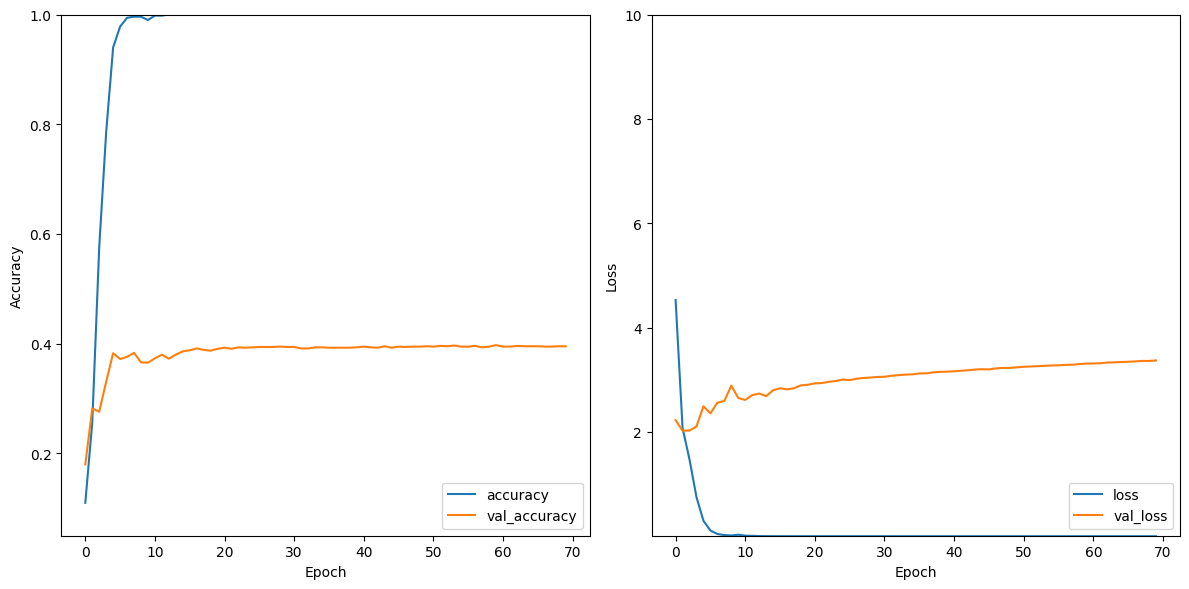

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy graph
ax1.plot(history.history['accuracy'], label='accuracy')
ax1.plot(history.history['val_accuracy'], label='val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0.05, 1])
ax1.legend(loc='lower right')

# Plot loss graph
ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label='val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_ylim([0.01, 10])
ax2.legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# TUNNING THE MODEL PART 1




In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # added another conv layer
model.add(layers.MaxPooling2D((2, 2))) # added another pooling layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(np.array(imagesTraining), np.array(labelsTraining), epochs=70, validation_data=(np.array(imagesTesting), np.array(labelsTesting)))

Epoch 1/70
16/16 [==============================] - 8s 408ms/step - loss: 2.5151 - accuracy: 0.1260 - val_loss: 2.2279 - val_accuracy: 0.1480
Epoch 2/70
16/16 [==============================] - 2s 134ms/step - loss: 2.1659 - accuracy: 0.2080 - val_loss: 2.1294 - val_accuracy: 0.2340
Epoch 3/70
16/16 [==============================] - 2s 103ms/step - loss: 1.8942 - accuracy: 0.3560 - val_loss: 2.0063 - val_accuracy: 0.2740
Epoch 4/70
16/16 [==============================] - 2s 103ms/step - loss: 1.5292 - accuracy: 0.4700 - val_loss: 2.1933 - val_accuracy: 0.3033
Epoch 5/70
16/16 [==============================] - 2s 132ms/step - loss: 1.2446 - accuracy: 0.6140 - val_loss: 2.2933 - val_accuracy: 0.3480
Epoch 6/70
16/16 [==============================] - 2s 131ms/step - loss: 0.9075 - accuracy: 0.7180 - val_loss: 2.2877 - val_accuracy: 0.3807
Epoch 7/70
16/16 [==============================] - 2s 104ms/step - loss: 0.5200 - accuracy: 0.8720 - val_loss: 2.9361 - val_accuracy: 0.2880
Epoch 

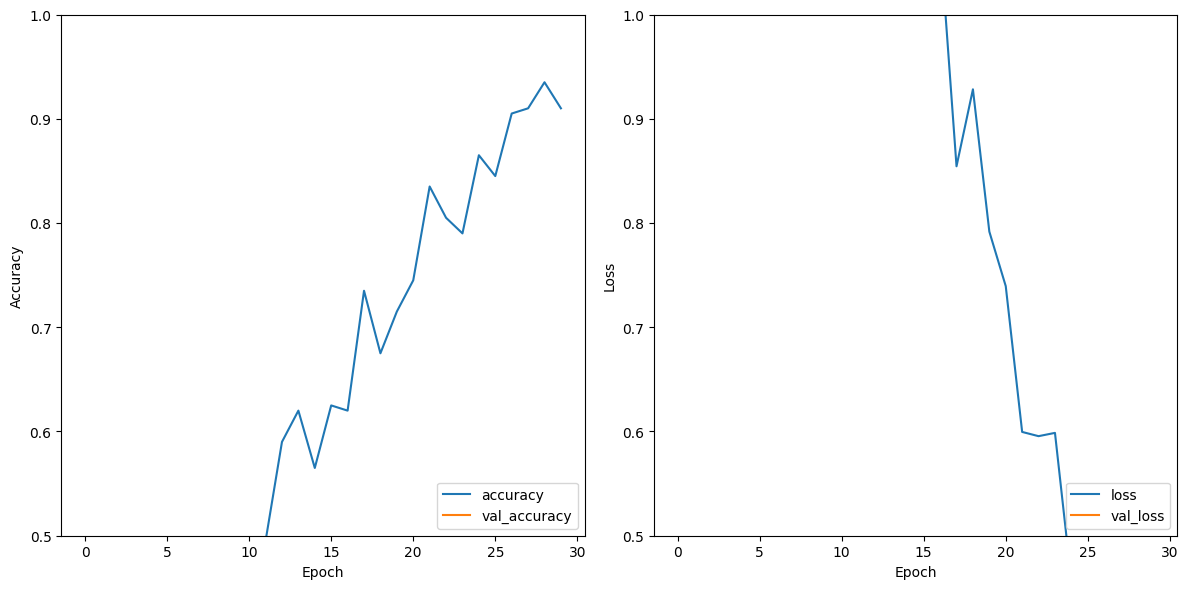

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy graph
ax1.plot(history.history['accuracy'], label='accuracy')
ax1.plot(history.history['val_accuracy'], label='val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0.5, 1])
ax1.legend(loc='lower right')

# Plot loss graph
ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label='val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_ylim([0.5, 1])
ax2.legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# TUNNING THE MODEL PART 2

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu', input_shape=(224, 224, 3))) # added padding
model.add(layers.MaxPooling2D((2,2), padding='same'))
model.add(layers.Conv2D(64, (3, 3), strides=(2,2), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((4,4), padding='same'))
model.add(layers.Conv2D(128, (3, 3), strides=(2,2), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((4, 4),padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.4)) # added dropout
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dropout(0.3)) # added dropout
model.add(layers.Dense(10, activation='softmax')) # added activation

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 1, 128)       

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(np.array(imagesTraining), np.array(labelsTraining), epochs=70, validation_data=(np.array(imagesTesting), np.array(labelsTesting)))

Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 9s 292ms/step - loss: 2.3078 - accuracy: 0.1080 - val_loss: 2.2820 - val_accuracy: 0.1873
Epoch 2/70
16/16 [==============================] - 2s 122ms/step - loss: 2.2254 - accuracy: 0.1800 - val_loss: 2.1157 - val_accuracy: 0.1940
Epoch 3/70
16/16 [==============================] - 1s 76ms/step - loss: 2.0981 - accuracy: 0.1740 - val_loss: 2.0269 - val_accuracy: 0.2033
Epoch 4/70
16/16 [==============================] - 1s 77ms/step - loss: 1.9966 - accuracy: 0.2340 - val_loss: 1.9937 - val_accuracy: 0.2353
Epoch 5/70
16/16 [==============================] - 2s 117ms/step - loss: 1.9654 - accuracy: 0.2320 - val_loss: 1.9751 - val_accuracy: 0.2440
Epoch 6/70
16/16 [==============================] - 1s 78ms/step - loss: 1.9452 - accuracy: 0.2300 - val_loss: 1.9099 - val_accuracy: 0.2393
Epoch 7/70
16/16 [==============================] - 1s 75ms/step - loss: 1.8071 - accuracy: 0.2980 - val_loss: 1.8519 - val_accuracy: 0.3013
Epoch 8/70
16/16 [===

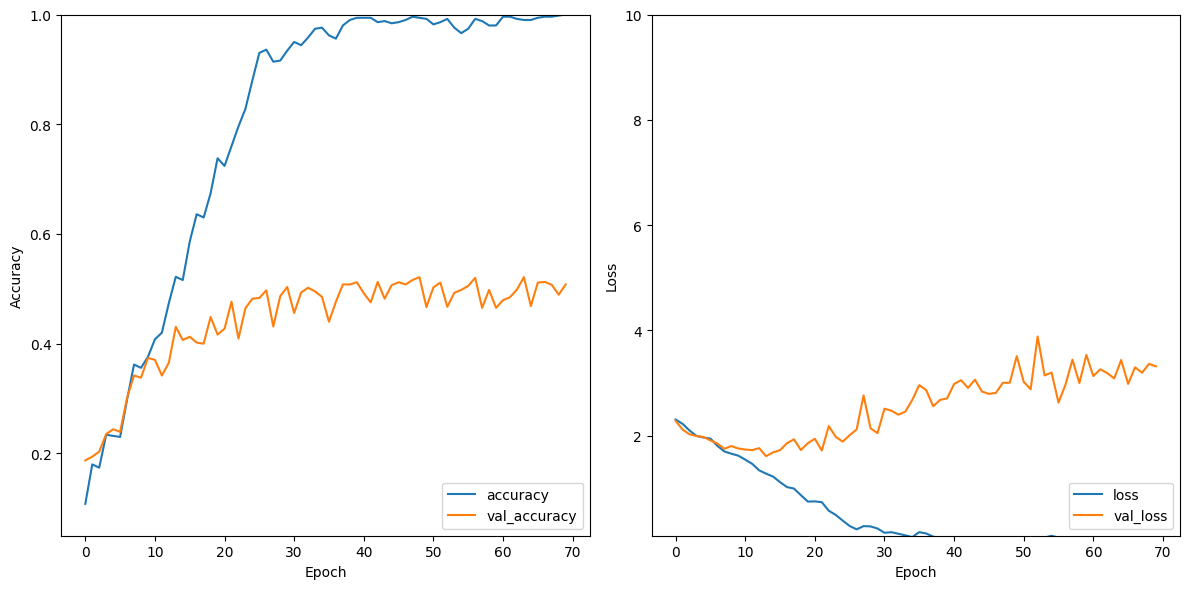

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy graph
ax1.plot(history.history['accuracy'], label='accuracy')
ax1.plot(history.history['val_accuracy'], label='val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0.05, 1])
ax1.legend(loc='lower right')

# Plot loss graph
ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label='val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_ylim([0.1, 10])
ax2.legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# TUNNING HYPERPARAMETERS


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2,2), padding='same'))
model.add(layers.Conv2D(64, (3, 3), strides=(2,2), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((4,4), padding='same'))
model.add(layers.Conv2D(128, (3, 3), strides=(2,2), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((4, 4),padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = model.fit(np.array(imagesTraining), np.array(labelsTraining), epochs=70, validation_data=(np.array(imagesTesting), np.array(labelsTesting)))

Epoch 1/70
16/16 [==============================] - 8s 377ms/step - loss: 0.1253 - accuracy: 0.9580 - val_loss: 3.3612 - val_accuracy: 0.4820
Epoch 2/70
16/16 [==============================] - 2s 119ms/step - loss: 0.0416 - accuracy: 0.9820 - val_loss: 3.6860 - val_accuracy: 0.4587
Epoch 3/70
16/16 [==============================] - 1s 78ms/step - loss: 0.0283 - accuracy: 0.9900 - val_loss: 3.3810 - val_accuracy: 0.4933
Epoch 4/70
16/16 [==============================] - 1s 76ms/step - loss: 0.0095 - accuracy: 0.9980 - val_loss: 3.4281 - val_accuracy: 0.4953
Epoch 5/70
16/16 [==============================] - 2s 118ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 3.4855 - val_accuracy: 0.5027
Epoch 6/70
16/16 [==============================] - 2s 118ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 3.5370 - val_accuracy: 0.5047
Epoch 7/70
16/16 [==============================] - 1s 80ms/step - loss: 0.0036 - accuracy: 0.9980 - val_loss: 3.7122 - val_accuracy: 0.5107
Epoch 8/7

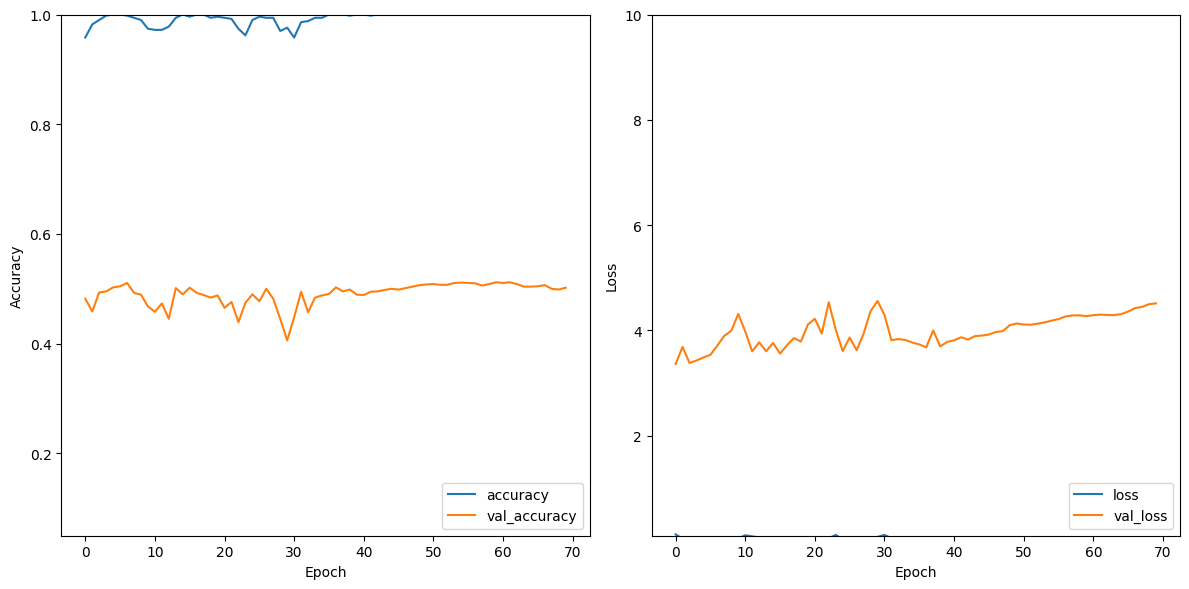

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy graph
ax1.plot(history.history['accuracy'], label='accuracy')
ax1.plot(history.history['val_accuracy'], label='val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0.05, 2])
ax1.legend(loc='lower right')

# Plot loss graph
ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label='val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_ylim([0.01, 8])
ax2.legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# MODEL SAVE

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/cnn_modelo_trab.h5')